In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_excel("/content/ElectionPrediction2024.xlsx")
data

,Party,Seats,Votes %
0,BJP,303,37.7
1,INC,52,19.7
2,DMK,23,2.3
3,AITC,22,4.1
4,YSRCP,22,2.6
5,IND,4,2.7
6,Others,116,30.9


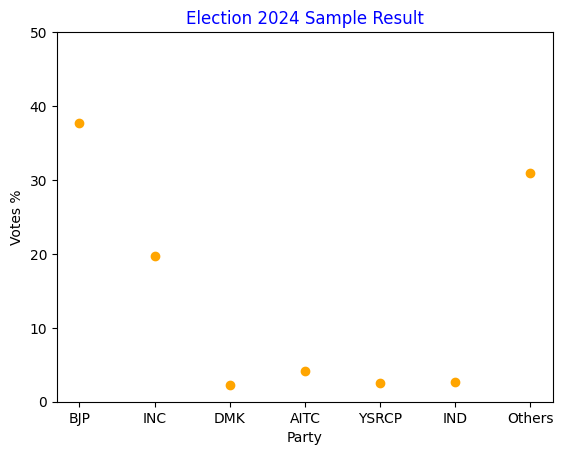

In [24]:
plt.scatter(data['Party'],data['Votes %'],color='orange')
plt.title("Election 2024 Sample Result",color='blue')
plt.xlim()
plt.ylim(0,50)
plt.xlabel("Party")
plt.ylabel("Votes %")
plt.show()


In [11]:
x = data.iloc[:,1:3] # 1t for rows and second for columns
x

,Seats,Votes %
0,303,37.7
1,52,19.7
2,23,2.3
3,22,4.1
4,22,2.6
5,4,2.7
6,116,30.9


In [12]:
kmeans = KMeans(3)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [25]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, 1, 1, 1, 2], dtype=int32)

In [14]:
data_with_clusters = data.copy()

In [15]:
data_with_clusters

,Party,Seats,Votes %
0,BJP,303,37.7
1,INC,52,19.7
2,DMK,23,2.3
3,AITC,22,4.1
4,YSRCP,22,2.6
5,IND,4,2.7
6,Others,116,30.9


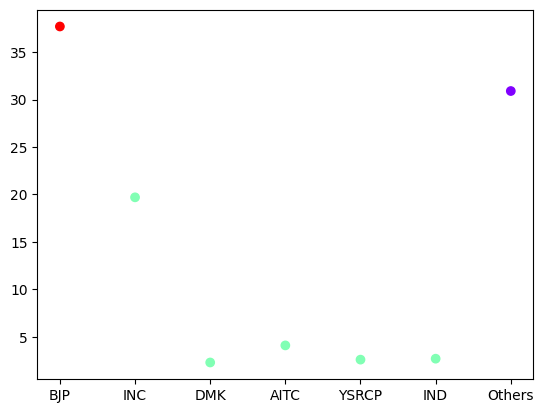

In [17]:
data_with_clusters['C'] = identified_clusters
plt.scatter(data_with_clusters['Party'],data_with_clusters['Votes %'],c=data_with_clusters['C'],cmap='rainbow')

In [18]:
data_with_clusters

,Party,Seats,Votes %,C
0,BJP,303,37.7,2
1,INC,52,19.7,1
2,DMK,23,2.3,1
3,AITC,22,4.1,1
4,YSRCP,22,2.6,1
5,IND,4,2.7,1
6,Others,116,30.9,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


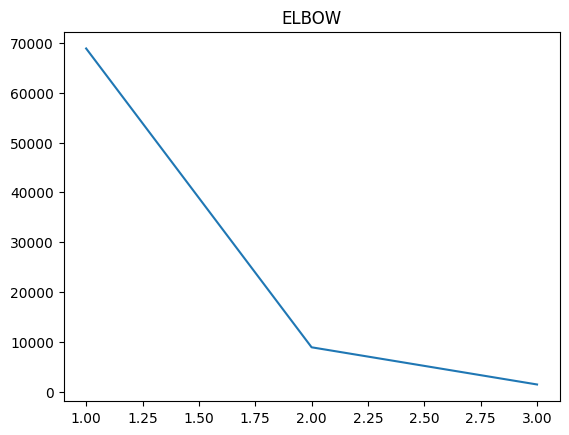

In [35]:
individual_clustering_score=[]
for i in range(1,4):
    kmeans=KMeans(n_clusters=i,init='random',random_state=42)
    kmeans.fit(x)
    individual_clustering_score.append(kmeans.inertia_)
plt.plot(range(1,4),individual_clustering_score)
plt.title("ELBOW")
plt.show()

In [31]:
x_data=data['Party']
y_data=data['Votes %']

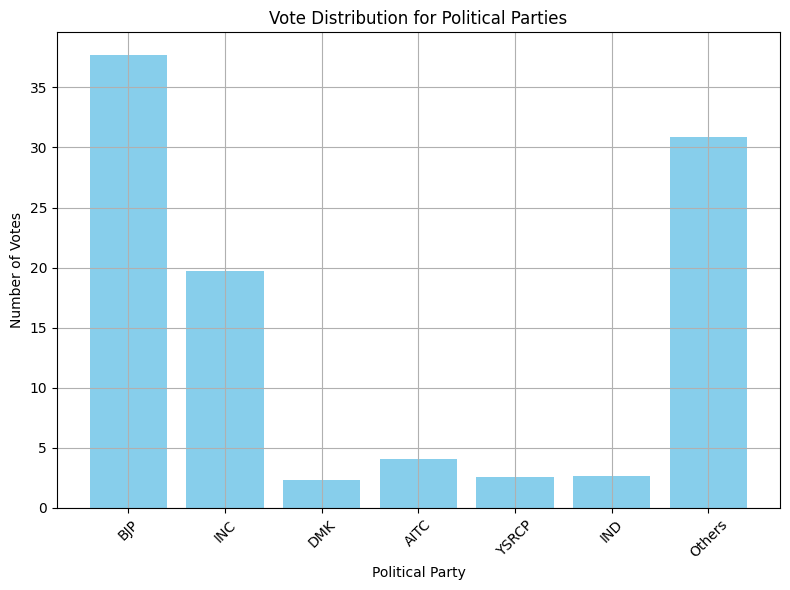

In [32]:
plt.figure(figsize=(8, 6))
plt.bar(x_data, y_data, color='skyblue')
plt.xlabel('Political Party')
plt.ylabel('Number of Votes')
plt.title('Vote Distribution for Political Parties')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

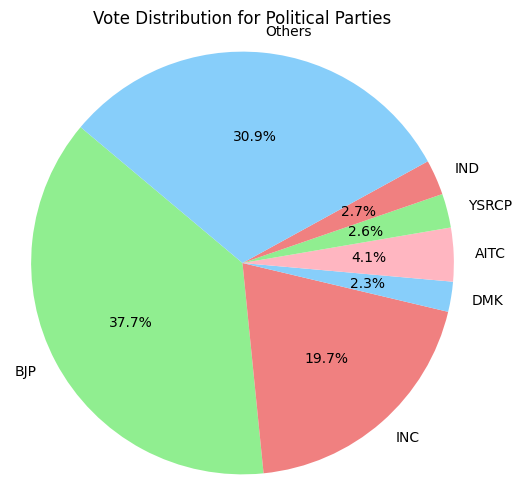

In [33]:
plt.figure(figsize=(6, 6))
plt.pie(y_data, labels=x_data, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.title('Vote Distribution for Political Parties')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()